#Laboratorio #6: Máquinas de Soporte Vectorial
Estudiantes:
- Josef Ruzicka - B87095
- Emmanuel Zúñiga - B98729


## Support Vector Machines

###Definiendo una Máquina de Soporte Vectorial

Las máquinas de soporte vectorial (SVM, por sus siglas en inglés: Support Vector Machines) son un tipo de algoritmo que fue desarrollado por Vladimir Vapnik y su equipo a finales de la década de 1990.

Una máquina de soporte vectorial (SVM) es un algoritmo de aprendizaje automático supervisado que se utiliza tanto para la clasificación como para la regresión. Su objetivo principal es encontrar un hiperplano en un espacio de características de alta dimensionalidad que permita separar o predecir los datos de manera óptima.

En el contexto de clasificación, se busca encontrar un hiperplano que pueda separar las diferentes clases de datos de forma clara. Para ello, la SVM busca maximizar el margen entre el hiperplano y los puntos de datos más cercanos de cada clase, conocidos como vectores de soporte. Estos vectores de soporte son los puntos críticos que influyen en la posición y orientación del hiperplano y son fundamentales para la clasificación precisa.

Además de los hiperplanos lineales, las SVM pueden utilizar una técnica llamada "kernel trick" o truco del kernel para mapear los datos de entrada a un espacio de mayor dimensionalidad donde sean más fácilmente separables. Esto permite a las SVM realizar clasificaciones no lineales al encontrar hiperplanos en espacios de características más complejos.

En el contexto de regresión, las SVM buscan encontrar una función que pueda aproximar de manera óptima los valores continuos de salida. En lugar de separar las clases, se busca encontrar una curva o superficie que pase lo más cerca posible de los puntos de datos, minimizando el error de predicción.

Para entrenar una SVM, se utiliza un conjunto de datos de entrenamiento etiquetado, donde cada ejemplo de entrenamiento está asociado con una clase o un valor de salida conocido. Durante el entrenamiento, la SVM ajusta los parámetros para encontrar el hiperplano o la función que mejor se ajuste a los datos y minimice el error.

Algunas de las ventajas de las SVM incluyen su capacidad para manejar eficazmente datos en espacios de alta dimensionalidad, su robustez ante la presencia de ruido y su capacidad para generalizar bien a partir de un conjunto de entrenamiento limitado. Sin embargo, pueden ser computacionalmente costosas en términos de tiempo de entrenamiento y memoria requerida, especialmente para grandes conjuntos de datos.

###Construcción de una Máquina de Soporte Vectorial para 





Lo primero, importamos todas las bibliotecas necesarias para la creación de una máquina de soporte vectorial. En este caso y como en ocaciones pasadas, utilizaremos Python y Sklearn para el ejercicio:

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import pandas as pd
import io
from matplotlib.colors import ListedColormap

En este ejemplo, asumimos que tienen un archivo de datos llamado 'train.csv' que contiene sus características (variables independientes) y una variable objetivo (variable dependiente) que deseas predecir. 

La función files.upload() en Python es una función proporcionada por la biblioteca google.colab cuando se ejecuta en Google Colab. Permite cargar archivos desde el sistema local al entorno de Colab.

Cuando ejecutan files.upload(), se abrirá una ventana emergente en la que pueden seleccionar uno o varios archivos de tu sistema local para cargarlos en el entorno de Colab. Una vez que seleccionan los archivos y confirman la selección, los archivos se cargan en el entorno y están disponibles para su uso en tu notebook.

In [ ]:
# Cargar los datos
from google.colab import files
uploadedTrain = files.upload()

Saving train.csv to train (2).csv


Para leer los datos cargados, utilizaremos dos funciones conocidas de python:

1. pd.read_csv(): Es una función proporcionada por la biblioteca Pandas en Python. Se utiliza para leer archivos CSV (Comma-Separated Values) y cargar los datos en un DataFrame de Pandas. Un archivo CSV contiene datos tabulares en forma de texto, donde cada línea representa una fila y los valores de cada fila están separados por comas u otros delimitadores.

2. La función pd.read_csv() toma como argumento el nombre del archivo CSV o una ruta de archivo, y opcionalmente puede aceptar otros parámetros para configurar la forma en que los datos se leen y se cargan. Retorna un DataFrame de Pandas que te permite manipular y analizar los datos de manera conveniente en Python.

In [ ]:
#Leen los datos que subieron utilizando io y pandas, cuidado con los nombres de los csv
dataEntrenamiento = pd.read_csv(io.BytesIO(uploadedTrain['train.csv']))

Mostramos una vista general del dataset de entrenamiento y del de pruebas con .head():

In [ ]:
dataEntrenamiento.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


Vamos a usar .isnull().sum().max(): Esta secuencia de métodos se utiliza en Python para calcular la cantidad máxima de valores nulos (NaN) en un DataFrame de Pandas o en una Serie.

1. .isnull() devuelve una matriz booleana del mismo tamaño que el DataFrame o Serie original, donde True indica que el valor es nulo (NaN) y False indica que no lo es.
2. .sum() suma los valores booleanos en la matriz resultante. Como True se interpreta como 1 y False como 0, la suma nos da la cantidad total de valores nulos en cada columna o en la Serie.
3. .max() devuelve el valor máximo de la suma de valores nulos.

De tal manera podemos ver si hay algún valor faltante:

In [ ]:
dataEntrenamiento.isnull().sum().max()
dataEntrenamiento.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

El valor de precio está 'hot-encoded', y en la vida real esto no sería de esta manera, por lo que utilizaremos describe() y unique() para entender mejor el valor:

1. El método describe() se utiliza en Python para obtener estadísticas descriptivas de un DataFrame o una Serie de Pandas. Proporciona información resumida sobre la distribución de los datos, incluyendo el recuento de valores no nulos, la media, la desviación estándar, los valores mínimo y máximo, y los percentiles.

2. El método unique() se utiliza en Python para obtener los valores únicos de una columna en un DataFrame o una Serie de Pandas. Retorna un arreglo que contiene los valores únicos presentes en la columna, en el orden en el que aparecen.

In [ ]:
dataEntrenamiento['price_range'].describe(), dataEntrenamiento['price_range'].unique()

(count    2000.000000
 mean        1.500000
 std         1.118314
 min         0.000000
 25%         0.750000
 50%         1.500000
 75%         2.250000
 max         3.000000
 Name: price_range, dtype: float64,
 array([1, 2, 3, 0]))

Transformamos los valores de entrenamiento en un array para poder hacer un gráfico de los puntos separados por las clases del atributo `price range`

In [ ]:
# plotting the decision boundries for the data 
#converting the data to array for plotting. 
X = np.array(dataEntrenamiento.iloc[:,[0,13]])
y = np.array(dataEntrenamiento['price_range'])
print("Shape of X:"+str(X.shape))
print("Shape of y:"+str(y.shape))

scaler = StandardScaler()
X = scaler.fit_transform(X)

Shape of X:(2000, 2)
Shape of y:(2000,)


In [ ]:
#Aquí solo se utilizan colores específicos para los puntos, pueden cambiar entre las dos listas de colores en el gráfico
cm_dark = ListedColormap(['#ff6060', '#8282ff','#ffaa00','#fff244','#4df9b9','#76e8fc','#3ad628'])
cm_bright = ListedColormap(['#ffafaf', '#c6c6ff','#ffaa00','#ffe2a8','#bfffe7','#c9f7ff','#9eff93'])

`plot.scatter()`: Esta función se utiliza para crear un gráfico de dispersión, también conocido como diagrama de dispersión. Un gráfico de dispersión muestra la relación entre dos conjuntos de datos, donde cada punto en el gráfico representa un par de valores correspondientes a las variables independientes y dependientes.

`show()`: Esta función se utiliza para mostrar los gráficos generados con matplotlib en una ventana o en un entorno interactivo. Una vez que has configurado y personalizado tu gráfico utilizando diferentes funciones de matplotlib, debes llamar a show() para que el gráfico se muestre.

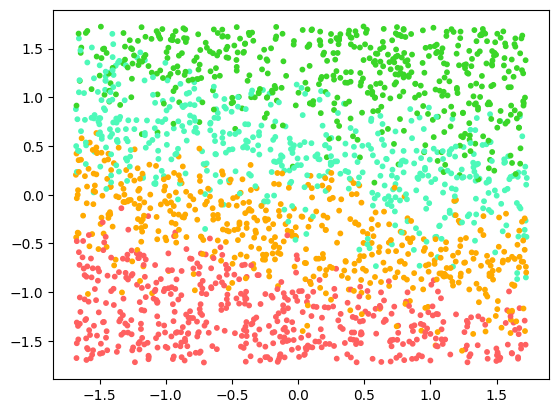

In [ ]:
plt.scatter(X[:,0],X[:,1],c=y,cmap=cm_dark,s=10,label=y)
plt.show()

En Python, el módulo scikit-learn proporciona la implementación del algoritmo de Máquinas de Vectores de Soporte (SVM) a través de la clase SVC (Support Vector Classifier) para clasificación, que será el que usemos a continuación, y SVR (Support Vector Regressor) para regresión. Estas clases tienen varios parámetros y opciones para ajustar el comportamiento del modelo SVM. A continuación, se detallan los parámetros y opciones más comunes:

1. C: Controla el factor de regularización. Un valor más alto de C indica un modelo con un ajuste más estricto a los datos de entrenamiento. Un valor más bajo de C permite un margen más grande y puede generar un modelo más generalizado. El valor predeterminado es 1.0.

2. kernel: Especifica el tipo de kernel utilizado en el SVM. Algunas opciones comunes son:

 * "linear": Kernel lineal que utiliza el producto escalar estándar.
 * "poly": Kernel polinómico que utiliza una función polinómica de grado degree.
 * "rbf" (Radial Basis Function): Kernel de función de base radial que utiliza una función de distancia radial.
 * "sigmoid": Kernel sigmoide que utiliza una función sigmoide.

3. degree (solo para kernel "poly"): Grado del polinomio en el kernel polinómico. El valor predeterminado es 3.

4. gamma (coeficiente del kernel) (solo para kernel "rbf", "poly" y "sigmoid"): Controla el ajuste de los datos de entrenamiento. Valores más altos de gamma generan un ajuste más estricto y pueden llevar a un sobreajuste. Valores más bajos de gamma generan un ajuste más suave y pueden llevar a un subajuste. El valor predeterminado es "scale" y se calcula como 1 / (n_features * X.var()), donde n_features es el número de características y X.var() es la varianza de los datos de entrenamiento.

5. coef0 (solo para kernel "poly" y "sigmoid"): Constante independiente en las funciones de kernel polinómico y sigmoide. El valor predeterminado es 0.0.

Estos son solo algunos de los parámetros más comunes, pero hay otros disponibles. La elección de los parámetros depende del problema específico que estén abordando y puede requerir un ajuste y experimentación adecuados.

In [ ]:
# Crear el modelo de clasificación SVM
svm_classifier = SVC(kernel='rbf', C=1.0)

Tomen en cuenta que la "variable objetivo" se refiere a la variable que desean predecir o clasificar. También se conoce como la "variable de respuesta" o "variable dependiente". En el caso de la clasificación, la variable objetivo suele ser una variable categórica o de etiqueta que representa las clases a las que pertenecen los datos de entrada.

 * Por ejemplo, si están trabajando en un problema de clasificación de correos electrónicos como "spam" o "no spam", la variable objetivo sería la etiqueta de clasificación que indica si un correo electrónico es spam o no. En este caso, la variable objetivo es una variable categórica binaria.

```
# Separar los datos en características (X) y variable objetivo (y)
X = data.drop('target_variable', axis=1)  # Cambiar 'target_variable' por el nombre de tu variable objetivo
y = data['target_variable']
```
El "conjunto de características" o "conjunto de variables explicativas" se refiere a las variables que se utilizan para predecir o clasificar la variable objetivo. Estas variables representan las características o atributos de los datos de entrada que se utilizarán para entrenar el modelo SVM.

 * Continuando con el ejemplo de clasificación de correos electrónicos, las características o variables explicativas pueden incluir el remitente del correo electrónico, el asunto, el contenido, la longitud del mensaje, etc. Estas características se utilizarán para construir el modelo SVM y realizar la clasificación de nuevos correos electrónicos.


In [ ]:
#Separar el conjunto de entrenamiento entre los conjuntos de características
X = dataEntrenamiento.drop(['price_range'], axis=1)
#Y la variable objetivo
y = dataEntrenamiento['price_range']

La función `train_test_split` en Python, que se encuentra en el módulo sklearn.model_selection de la biblioteca scikit-learn, se utiliza para dividir un conjunto de datos en conjuntos de entrenamiento y prueba. Esta función es ampliamente utilizada en el aprendizaje automático para evaluar el rendimiento de los modelos y evitar el sobreajuste.

In [ ]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X representa el conjunto de características (variables explicativas) y y representa la variable objetivo. test_size indica el tamaño proporcional del conjunto de prueba (por ejemplo, 0.2 para el 20% del conjunto de datos), y random_state se utiliza para establecer una semilla aleatoria y garantizar la reproducibilidad de la división de datos.

La función train_test_split devuelve cuatro conjuntos de datos: X_train, X_test, y_train y y_test. Los conjuntos X_train y y_train se utilizan para entrenar el modelo, mientras que los conjuntos X_test y y_test se utilizan para evaluar el rendimiento del modelo.

La división realizada por train_test_split se realiza de forma aleatoria, lo que ayuda a garantizar que los conjuntos de entrenamiento y prueba sean representativos y no estén sesgados. Esto es importante para obtener resultados de evaluación confiables del modelo.

Es importante tener en cuenta que train_test_split se utiliza principalmente para evaluación inicial de modelos. En situaciones más avanzadas, como la validación cruzada, se pueden utilizar técnicas más sofisticadas para obtener estimaciones más confiables del rendimiento del modelo.

En una máquina de soporte vectorial (SVM), es recomendable escalar los datos de entrenamiento y prueba por varias razones:

1. Preservar la consistencia: Al escalar los datos, se asegura que todas las características tengan la misma escala y rango. Esto es importante porque los SVM calculan distancias y productos escalares entre los puntos de datos. Si las características no están en la misma escala, algunas características podrían tener un impacto desproporcionado en el modelo, lo que puede sesgar los resultados.

2. Mejorar la convergencia: El proceso de optimización utilizado en los SVM para encontrar el hiperplano óptimo es más efectivo cuando las características están en una escala similar. Esto ayuda a que el algoritmo de optimización converja más rápido y de manera más confiable.

3. Mitigar el impacto de valores atípicos: Al escalar los datos, los valores atípicos o extremos en una característica no tendrán un impacto desproporcionado en el modelo SVM. Esto es particularmente importante en SVM lineales, donde los puntos de datos más lejanos (vectores de soporte) influyen en la posición del hiperplano de decisión.

4. Interpretación y comparación: Al escalar los datos, los coeficientes de los vectores de soporte pueden tener una interpretación más clara y directa. Además, también facilita la comparación de los efectos relativos de diferentes características en el modelo.

Al escalar los datos, se debe aplicar la misma transformación tanto al conjunto de entrenamiento como al conjunto de prueba. Esto garantiza que los datos de prueba se ajusten correctamente al modelo entrenado.

La escala más comúnmente utilizada es la normalización (también conocida como escalado a [0, 1]) o la estandarización (escala con media 0 y desviación estándar 1). La elección de la técnica de escala depende del contexto y de las características específicas de los datos.

StandardScaler() en Python, es una clase del módulo sklearn.preprocessing de la biblioteca scikit-learn que se utiliza para estandarizar características numéricas al escalarlas a una media cero y una desviación estándar de uno. Este proceso de estandarización ayuda a garantizar que todas las características tengan la misma escala y es útil en varios algoritmos de aprendizaje automático, incluidos los SVM.

In [ ]:
# Escalar los datos
cols = X_train.columns
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

En un clasificador de máquinas de soporte vectorial (SVM), se utiliza un pd.DataFrame como una estructura de datos conveniente para almacenar y manipular los datos de entrada. Un pd.DataFrame es una estructura tabular bidimensional proporcionada por la biblioteca pandas en Python. Proporciona muchas funcionalidades útiles para trabajar con datos estructurados, como la indexación, filtrado, manipulación y agregación de datos.

In [ ]:
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])
X_train.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
count,1.600000e+03,1.600000e+03,1.600000e+03,1.600000e+03,1.600000e+03,1.600000e+03,1.600000e+03,1.600000e+03,1.600000e+03,1.600000e+03,1.600000e+03,1.600000e+03,1.600000e+03,1.600000e+03,1.600000e+03,1.600000e+03,1.600000e+03,1.600000e+03,1.600000e+03,1.600000e+03
mean,1.909584e-16,-5.551115e-18,-2.620126e-16,-1.554312e-17,1.110223e-16,3.996803e-17,-1.709743e-16,2.975398e-16,2.220446e-16,-1.809664e-16,-1.132427e-16,-1.243450e-16,-1.665335e-16,9.325873e-17,-1.532108e-16,-1.021405e-16,-2.775558e-17,-1.382228e-16,8.881784e-18,-2.886580e-17
std,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00
min,-1.679133e+00,-9.814225e-01,-1.236230e+00,-1.030464e+00,-9.935611e-01,-1.046060e+00,-1.664149e+00,-1.403674e+00,-1.716351e+00,-1.547446e+00,-1.642804e+00,-1.446732e+00,-1.736440e+00,-1.719897e+00,-1.717388e+00,-1.315416e+00,-1.626742e+00,-1.794892e+00,-1.010051e+00,-9.975031e-01
25%,-8.824736e-01,-9.814225e-01,-1.022798e+00,-1.030464e+00,-7.630365e-01,-1.046060e+00,-8.944732e-01,-1.054989e+00,-8.954521e-01,-6.737997e-01,-8.112676e-01,-8.179388e-01,-8.694853e-01,-8.361749e-01,-7.659267e-01,-8.543214e-01,-9.002645e-01,5.571367e-01,-1.010051e+00,-9.975031e-01
50%,-2.226278e-02,-9.814225e-01,-1.661722e-02,9.704368e-01,-3.019872e-01,9.559684e-01,1.264467e-02,-8.935045e-03,1.036739e-02,-2.369765e-01,2.026870e-02,-2.014972e-01,-1.759842e-02,-5.212318e-03,-5.233040e-02,-1.626798e-01,7.832335e-03,5.571367e-01,9.900495e-01,-9.975031e-01
75%,8.583753e-01,1.018929e+00,8.676019e-01,9.704368e-01,6.201112e-01,9.559684e-01,8.647857e-01,1.037119e+00,8.595732e-01,1.073493e+00,8.518049e-01,6.765671e-01,8.742750e-01,8.569895e-01,8.991314e-01,7.595088e-01,9.159292e-01,5.571367e-01,9.900495e-01,1.002503e+00
max,1.718586e+00,1.018929e+00,1.812802e+00,9.704368e-01,3.386407e+00,9.559684e-01,1.744415e+00,1.734488e+00,1.680472e+00,1.510316e+00,1.683341e+00,2.954818e+00,1.736014e+00,1.741869e+00,1.612728e+00,2.834433e+00,1.642407e+00,5.571367e-01,9.900495e-01,1.002503e+00


La función svm_classifier.fit(X, y) se utiliza en scikit-learn para entrenar un clasificador de Máquinas de Vectores de Soporte (SVM). Esta función ajusta el modelo SVM a los datos de entrenamiento X y las etiquetas de clase correspondientes y.

El proceso de ajuste implica encontrar el hiperplano óptimo que separa las clases en el espacio de características. El clasificador SVM busca el hiperplano de separación maximizando el margen entre las muestras de entrenamiento más cercanas a él, que son conocidas como vectores de soporte.

#### ¿cómo funciona svm_classifier.fit()?

1. Preparación de los datos: Antes de llamar a fit(), es importante asegurarse de que los datos de entrenamiento X y las etiquetas de clase y estén en el formato adecuado. X debe ser una matriz de características, donde cada fila representa una muestra y cada columna representa una característica. y debe ser una matriz o una lista que contenga las etiquetas correspondientes a las muestras de X.

2. Ajuste del modelo: Al llamar a svm_classifier.fit(X, y), se inicia el proceso de ajuste del modelo. Durante este proceso, el clasificador SVM utiliza un algoritmo de optimización para encontrar los parámetros óptimos que definen el hiperplano de separación.

3. Optimización: El algoritmo de optimización utilizado en SVM busca encontrar los valores óptimos de los pesos w y el término de sesgo b en la función de decisión. Estos parámetros determinan la ubicación y orientación del hiperplano de separación.

4. Cálculo de los vectores de soporte: Durante la optimización, el clasificador SVM identifica los vectores de soporte, que son las muestras de entrenamiento más cercanas al hiperplano de separación. Estos vectores de soporte son cruciales para el funcionamiento del clasificador, ya que definen la ubicación del hiperplano y se utilizan para realizar predicciones.

5. Finalización del ajuste: Una vez que se completa la optimización, el modelo SVM ha sido ajustado a los datos de entrenamiento. Ahora está listo para realizar predicciones en nuevos datos utilizando la función svm_classifier.predict(X_new).

El proceso de ajuste puede variar dependiendo de los parámetros específicos que se utilicen en el clasificador SVM, como el tipo de kernel, los parámetros de regularización y otros ajustes relacionados. Es recomendable consultar la documentación de scikit-learn para obtener detalles sobre los parámetros y opciones específicas del clasificador SVM que estén utilizando.

In [ ]:
#Entrenamos el clasificador
svm_classifier.fit(X_train,y_train)

SVC()

La función svm_classifier.predict(X) en Python se utiliza para realizar predicciones utilizando un clasificador de Máquinas de Vectores de Soporte (SVM). Dado un conjunto de datos de entrada X, esta función devuelve las etiquetas de clase predichas por el modelo SVM.

#### ¿cómo funciona svm_classifier.predict()?

1. Preparación de los datos: Antes de llamar a predict(), es importante asegurarse de que los datos de entrada X estén en el formato adecuado. X debe ser una matriz de características, donde cada fila representa una muestra y cada columna representa una característica.

2. Extracción de características: Si se realizaron transformaciones o ajustes a los datos de entrenamiento antes de ajustar el modelo SVM (por ejemplo, escalamiento de características), es importante aplicar las mismas transformaciones a los datos de prueba antes de realizar predicciones. Esto garantiza que los datos de prueba se ajusten correctamente al modelo entrenado.

3. Predicción: Al llamar a svm_classifier.predict(X), se realiza la predicción utilizando el modelo SVM entrenado. El clasificador SVM utiliza el hiperplano de separación óptimo y los vectores de soporte identificados durante el entrenamiento para determinar las etiquetas de clase predichas para las muestras de entrada X.

4. Etiquetas de clase: La función predict() devuelve una matriz o una lista que contiene las etiquetas de clase predichas para las muestras de entrada X. Cada etiqueta de clase representa la clase a la que se predice que pertenece una muestra en particular.

A continuación usamos la función predict() para el dataset de pruebas que teníamos ya conformado:

In [ ]:
#Hacemos las predicciones con el set de pruebas
y_pred = svm_classifier.predict(X_test)

La función accuracy_score(y_true, y_pred) se utiliza en scikit-learn para calcular la precisión de las predicciones de un modelo de clasificación, incluyendo un modelo SVM.

* Datos de entrada: Antes de llamar a accuracy_score(), necesitas tener dos conjuntos de etiquetas de clase: y_true y y_pred.

 * y_true es una matriz o una lista que contiene las etiquetas de clase reales o verdaderas para un conjunto de datos.
 * y_pred es una matriz o una lista que contiene las etiquetas de clase predichas por el modelo SVM para el mismo conjunto de datos.

* Comparación de etiquetas: La función accuracy_score() compara las etiquetas de clase reales (y_true) con las etiquetas de clase predichas (y_pred), elemento por elemento.

* Cálculo de precisión: Para calcular la precisión, accuracy_score() cuenta el número de predicciones correctas y lo divide por el número total de predicciones. Esto se realiza mediante la fórmula:

```
precision = (Número de predicciones correctas) / (Número total de predicciones)
```

* Valor de retorno: La función accuracy_score() devuelve un solo valor que representa la precisión del modelo SVM en términos de la fracción de predicciones correctas.

La precisión resultante será un número entre 0 y 1, donde un valor más cercano a 1 indica una mayor precisión en las predicciones del modelo SVM.

In [ ]:
# compute and print accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

Model accuracy score with default hyperparameters: 0.8925


Por último, aquí un ejemplo rápido de entrenamiento y predicción con su presición para que puedan definir varios parámetros y funciones de kernel para obtener un mejor resultado según los datos de entrenamiento graficados anterioremente:

In [ ]:
# instantiate classifier with rbf kernel and C=100
svm_classifier = SVC(kernel='linear', C=100.0)
svm_classifier.fit(X_train,y_train)
y_pred=svm_classifier.predict(X_test)
# compute and print accuracy score
print('Model accuracy score with rbf kernel and C=100.0 : {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

Model accuracy score with rbf kernel and C=100.0 : 0.9750


## Support Vector Machines: Ejercicio Práctico

Bajo la misma metodología de los laboratorios pasados, busquen un dataset para aplicar lo aprendido y predecir una variable objetivo del mismo. Para este laboratorio:

1. Buscar un dataset y utilizarlo con las técnicas aprendidas en este ejercicio.
2. Aplicar preprocesamiento de datos de ser necesario para ordenar el dataset para su mejor aplicación del ejercicio.
3. Dividir el dataset en un conjunto de pruebas y otro de entrenamiento según lo definan sea mejor para su caso. 
4. Crear y utilizar una máquina de soporte vectorial para clasificación
5. Utilizar el dataset de entrenamiento para entrenar el clasificador
6. Realizar las pruebas con el conjunto que separaron.
7. Desplegar la precisión que con los parámetros y función de kernel con la que lograron una mejor predicción general.
8. Para cada punto anterior, separan el código con una explicación de lo realizado y aprendido en el apartado.  

###Ejercicio Práctico
####Explicación / Conclusiones del apartado

#### Carga del dataset

Se utilizará un conjunto de datos sobre la predicción de la calidad del vino. Puede consultarse el dataset haciendo click [aquí](https://www.kaggle.com/datasets/yasserh/wine-quality-dataset)

In [ ]:
# Código
# Se carga el dataset directamente desde google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/datasets/WineQT.csv')

Se muestran los primeros 10 registros del dataset.

In [ ]:
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,6
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,8
9,6.7,0.58,0.08,1.8,0.097,15.0,65.0,0.9959,3.28,0.54,9.2,5,10


#### Preprocesamiento de Datos

A continuación, se aplicarán técnicas de preprocesamiento de datos para así, si es el caso, obtener un conjunto de datos de mayor calidad.

En primer lugar, se verificara la cantidad de NaN en el conjunto de datos.

In [ ]:
# Calcular mayor cantidad de valores nulos
max_missing_values = df.isnull().sum().max()

# Obtener nombre de las columnas
column_names = df.columns

print("Maximum number of missing values:", max_missing_values)
print("Column names:", column_names)

Maximum number of missing values: 0
Column names: Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id'],
      dtype='object')


Según el valor máximo de NaN obtenido, no hay presencia de nulos en el conjunto de datos. No obstante, se procederá a hacer otra verificación.

In [ ]:
hay_nulos = df.isnull().any().any()

if hay_nulos:
    print("Se encontraron valores NaN o nulos en el conjunto de datos.")
else:
    print("No se encontraron valores NaN o nulos en el conjunto de datos.")

No se encontraron valores NaN o nulos en el conjunto de datos.


Una vez preprocesados los datos, se continuará con el análisis exploratorio.

#### Creación de Conjunto de Pruebas

Transformamos los valores de entrenamiento en un array para poder hacer un gráfico de los puntos separados por las clases del atributo `quality`.
Para ello, se realizará un scatterplot de los atributos con respecto al atributo mencionado anteriormente.

In [ ]:
# plotting the decision boundries for the data 
#converting the data to array for plotting. 
df_copy = df.drop(df.columns[-2:], axis=1)
X = np.array(df_copy.iloc[:,[0, 10]])
y = np.array(df['quality'])
print("Shape of X:"+str(X.shape))
print("Shape of y:"+str(y.shape))

scaler = StandardScaler()
X = scaler.fit_transform(X)

Shape of X:(1143, 2)
Shape of y:(1143,)


Una vez transformados los datos en un array, se procede a graficar los puntos con respecto a `quality`





In [ ]:
#Aquí solo se utilizan colores específicos para los puntos, pueden cambiar entre las dos listas de colores en el gráfico
cm_dark = ListedColormap(['#ff6060', '#8282ff','#ffaa00','#fff244','#4df9b9','#76e8fc','#3ad628'])
cm_bright = ListedColormap(['#ffafaf', '#c6c6ff','#ffaa00','#ffe2a8','#bfffe7','#c9f7ff','#9eff93'])

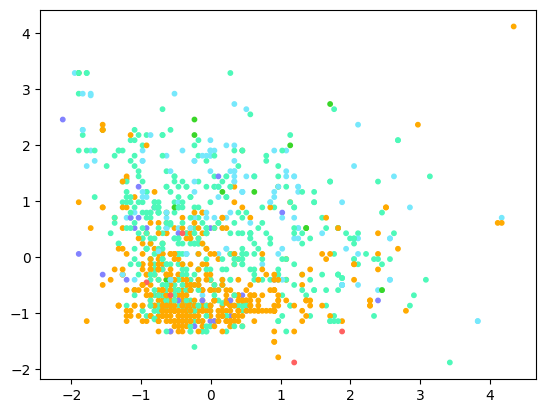

In [ ]:
plt.scatter(X[:,0],X[:,1],c=y,cmap=cm_dark,s=10,label=y)
plt.show()

A partir del gráfico anterior, es posible observar como es complicado diferenciar las clases de datos en cuestión. No es posible establecer una separación adecuada en el hiperplano.

In [ ]:
# Crear el modelo de clasificación SVM
svm_classifier = SVC(kernel='rbf', C=5.9, degree=3, gamma='scale')

In [ ]:
#Separar el conjunto de entrenamiento entre los conjuntos de características
X = df.drop(['quality'], axis=1)
#Y la variable objetivo
y = df['quality']

Se crean los conjuntos de datos para entrenamiento y prueba utilizando una 80:20

In [ ]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Escalar los datos
cols = X_train.columns
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])
X_train.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Id
count,9.140000e+02,9.140000e+02,9.140000e+02,9.140000e+02,9.140000e+02,9.140000e+02,9.140000e+02,9.140000e+02,9.140000e+02,9.140000e+02,9.140000e+02,9.140000e+02
mean,-6.024843e-16,-2.448807e-16,-3.498296e-17,2.021238e-16,1.166099e-16,-7.190941e-17,-9.814663e-17,-2.151452e-14,1.096133e-15,1.515928e-16,-1.788018e-15,1.554798e-17
std,1.000547e+00,1.000547e+00,1.000547e+00,1.000547e+00,1.000547e+00,1.000547e+00,1.000547e+00,1.000547e+00,1.000547e+00,1.000547e+00,1.000547e+00,1.000547e+00
min,-2.157627e+00,-2.296839e+00,-1.363945e+00,-1.240674e+00,-1.570871e+00,-1.437349e+00,-1.248393e+00,-3.456101e+00,-3.757761e+00,-1.961070e+00,-1.898352e+00,-1.755476e+00
25%,-6.830710e-01,-7.321492e-01,-9.021105e-01,-4.743962e-01,-3.475158e-01,-8.509466e-01,-7.783490e-01,-6.076910e-01,-6.821032e-01,-6.362081e-01,-8.743227e-01,-8.681500e-01
50%,-2.112132e-01,-6.156778e-02,-8.107092e-02,-2.445129e-01,-1.787772e-01,-2.645441e-01,-2.456329e-01,-1.971638e-02,-2.770798e-02,-2.146609e-01,-2.226675e-01,2.025232e-02
75%,4.375913e-01,6.090136e-01,7.912837e-01,6.199805e-02,7.433087e-02,5.173259e-01,5.064369e-01,5.839375e-01,5.612477e-01,3.875493e-01,7.082685e-01,8.682971e-01
max,4.330418e+00,5.861901e+00,3.767552e+00,9.946978e+00,1.106344e+01,5.110812e+00,7.275065e+00,3.406216e+00,4.553059e+00,8.095840e+00,3.314889e+00,1.681904e+00


#### Entrenamiento del Modelo

In [ ]:
#Entrenamos el clasificador
svm_classifier.fit(X_train,y_train)

SVC(C=5.9)

#### Predicciones

In [ ]:
#Hacemos las predicciones con el set de pruebas
y_pred = svm_classifier.predict(X_test)

In [ ]:
# compute and print accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

Model accuracy score with default hyperparameters: 0.6943


In [ ]:
# instantiate classifier with rbf kernel and C=100
svm_classifier = SVC(kernel='rbf', C=5.9, degree=3, gamma='scale')
svm_classifier.fit(X_train,y_train)
y_pred=svm_classifier.predict(X_test)
# compute and print accuracy score
print('Model accuracy score with rbf kernel and C=5.9 : {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

Model accuracy score with rbf kernel and C=5.9 : 0.6943


Tomando en consideración que los datos de diferentes calificaciones eran muy parecidos entre sí, al probar diferentes valores de Kernel, C y función gamma, se obtuvo una precisión de 69% en la máquina de soporte vectorial, lo que resulta satisfactorio ya que se trata de calificaciones de calidad de vino, no es algo de vida o muerte y clasificar correctamente más de 2/3 partes de los datos.
Se realizó las pruebas con diferentes combinaciones de hiperparámetros, pero la mejor combinación fue la utilizada anteriormente.